In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from astropy.table import unique, Table

from numpy.lib.recfunctions import structured_to_unstructured
import fitsio

In [2]:
tbl_data = Table.read("../qnet_ensemble_guadalupe.csv")

In [3]:
tbl_data

TARGETID,TILEID,EXPID,C_NOT,C_QSO_LZ,C_QSO_HZ,BMU
int64,int64,int64,float64,float64,float64,int64
39627758518669118,1000,89031,0.135,0.865,0.0,1086
39627764562658182,1000,89031,1.0,0.0,0.0,180
39627764562660466,1000,89031,0.015,0.0,0.985,919
39627764566852122,1000,89031,1.0,0.0,0.0,1052
39627764566854344,1000,89031,1.0,0.0,0.0,1012
616088516866081489,1000,89031,1.0,0.0,0.0,1325
39627764562662455,1000,89031,1.0,0.0,0.0,963
39627764562661595,1000,89031,1.0,0.0,0.0,1021
39627758518669735,1000,89031,1.0,0.0,0.0,976


In [4]:
cs = sorted(tbl_data["C_NOT"])
cs = np.diff(cs)
cs_nonzero = cs != 0
n_ens = int(1 / np.min(cs[cs_nonzero]))
n_ens

200

In [5]:
tile_ids = sorted(np.unique(tbl_data["TILEID"]))
tile_ids, len(tile_ids)

([1000,
  1001,
  1007,
  1010,
  1030,
  1078,
  1080,
  1081,
  1082,
  1083,
  1084,
  1085,
  1086,
  1087,
  1088,
  1089,
  1090,
  1091,
  1092,
  1093,
  1094,
  1095,
  1096,
  1097,
  1098,
  1099,
  1100,
  1101,
  1102,
  1103,
  1104,
  1105,
  1106,
  1107,
  1108,
  1109,
  1110,
  1111,
  1114,
  1116,
  1199,
  1200,
  1249,
  1411,
  1412,
  1430,
  1737,
  1750,
  1758,
  1773,
  1774,
  1833,
  1901,
  2071,
  2161,
  2163,
  20419,
  20886,
  20916,
  21089,
  21190],
 61)

In [6]:
def calc_entropy(confidence):
    H = confidence * np.log(confidence)
    H = np.where(confidence == 0, 0, H)
    return -np.sum(H, axis=1)


In [7]:
confs = structured_to_unstructured(np.asarray(tbl_data["C_NOT", "C_QSO_LZ", "C_QSO_HZ"]))
entropy = calc_entropy(confs)

/tmp/ipykernel_93800/885452469.py:2: RuntimeWarning: divide by zero encountered in log
  H = confidence * np.log(confidence)
/tmp/ipykernel_93800/885452469.py:2: RuntimeWarning: invalid value encountered in multiply
  H = confidence * np.log(confidence)


In [8]:
tbl_data.add_column(entropy, name="ENTROPY")

In [9]:
tbl_data.sort("ENTROPY", reverse=True)

tbl_data

TARGETID,TILEID,EXPID,C_NOT,C_QSO_LZ,C_QSO_HZ,BMU,ENTROPY
int64,int64,int64,float64,float64,float64,int64,float64
39627703741055635,1083,91171,0.335,0.34,0.325,1185,1.0984368565761047
39627915024928724,1116,93368,0.3,0.395,0.305,1353,1.0902655675840731
39627885597689226,1412,89035,0.4,0.315,0.285,1488,1.0881496625323044
39633016040983597,1737,88541,0.265,0.375,0.36,1491,1.087532164034828
39627790399570335,1010,97962,0.405,0.315,0.28,1445,1.0863795466865245
39627830631336371,1086,90762,0.265,0.34,0.395,117,1.0856254879723746
39627933102377158,1114,93261,0.385,0.26,0.355,934,1.0853775559535304
39633020868625571,1737,88541,0.34,0.26,0.4,1443,1.0835507260874366
39627854698255362,1111,93260,0.415,0.26,0.325,1489,1.0804992847651955


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1 ]
0.6899437584583995


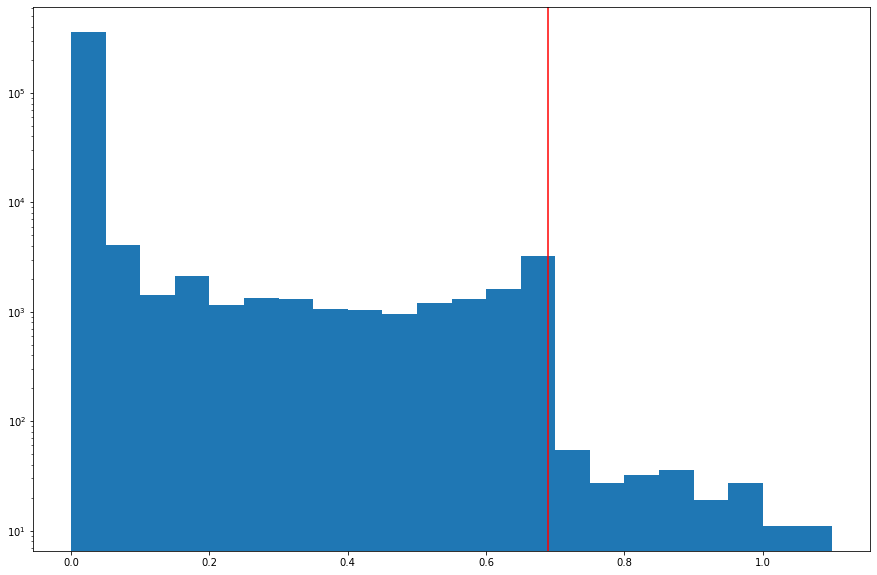

In [10]:
bins = np.linspace(0, 1.1, 23)
print(bins)
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, _ = plt.hist(entropy, bins=bins)
plt.yscale("log")

cutoff = sorted(entropy)[-1000]
plt.axvline(x = cutoff, c="r")
print(cutoff)

In [11]:
percentile_cut = 15
bmu_counts = np.bincount(tbl_data["BMU"], minlength=np.max(tbl_data["BMU"]))
good_bmu = bmu_counts > np.percentile(bmu_counts, percentile_cut)
good_idcs = good_bmu[tbl_data["BMU"]]

tbl_reduced = tbl_data[good_idcs]
tbl_reduced

TARGETID,TILEID,EXPID,C_NOT,C_QSO_LZ,C_QSO_HZ,BMU,ENTROPY
int64,int64,int64,float64,float64,float64,int64,float64
39627703741055635,1083,91171,0.335,0.34,0.325,1185,1.0984368565761047
39627915024928724,1116,93368,0.3,0.395,0.305,1353,1.0902655675840731
39627885597689226,1412,89035,0.4,0.315,0.285,1488,1.0881496625323044
39633016040983597,1737,88541,0.265,0.375,0.36,1491,1.087532164034828
39627790399570335,1010,97962,0.405,0.315,0.28,1445,1.0863795466865245
39627830631336371,1086,90762,0.265,0.34,0.395,117,1.0856254879723746
39627933102377158,1114,93261,0.385,0.26,0.355,934,1.0853775559535304
39633020868625571,1737,88541,0.34,0.26,0.4,1443,1.0835507260874366
39627854698255362,1111,93260,0.415,0.26,0.325,1489,1.0804992847651955


In [12]:
tbl_no_dupe = unique(tbl_reduced, keys="TARGETID")
tbl_no_dupe.sort("ENTROPY", reverse=True)
tbl_no_dupe

TARGETID,TILEID,EXPID,C_NOT,C_QSO_LZ,C_QSO_HZ,BMU,ENTROPY
int64,int64,int64,float64,float64,float64,int64,float64
39627703741055635,1083,91171,0.335,0.34,0.325,1185,1.0984368565761047
39627915024928724,1116,93368,0.3,0.395,0.305,1353,1.0902655675840731
39627885597689226,1412,89035,0.4,0.315,0.285,1488,1.0881496625323044
39633016040983597,1737,88541,0.265,0.375,0.36,1491,1.087532164034828
39627790399570335,1010,97962,0.405,0.315,0.28,1445,1.0863795466865245
39627830631336371,1086,90762,0.265,0.34,0.395,117,1.0856254879723746
39627933102377158,1114,93261,0.385,0.26,0.355,934,1.0853775559535304
39633020868625571,1737,88541,0.34,0.26,0.4,1443,1.0835507260874366
39627854698255362,1111,93260,0.415,0.26,0.325,1489,1.0804992847651955


[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1  ]
0.6899437584583995


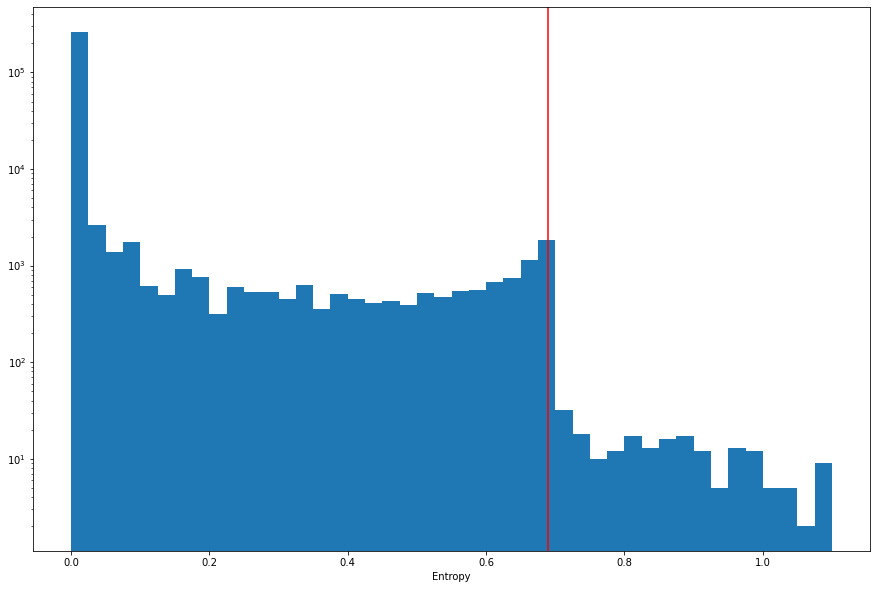

In [13]:
entropy_reduced = tbl_no_dupe["ENTROPY"][:]
bins = np.linspace(0, 1.1, 23*2 - 1)
print(bins)
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, _ = plt.hist(entropy_reduced, bins=bins)
plt.yscale("log")

cutoff = sorted(entropy_reduced)[-1000]
plt.axvline(x = cutoff, c="r")

plt.xlabel("Entropy")
print(cutoff)
plt.savefig("entropy_dist.jpg", dpi=256, bbox_inches="tight")

In [20]:
target_id_file = "targetid_selection.txt"
with open(target_id_file, "w") as f:
    for x in tbl_no_dupe["TARGETID"][:1000]:
        f.write(f"{x}\n")